In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, transforms

In [2]:
BATCH_SIZE = 32
NUM_OF_WORKERS = 2
NUM_OF_EPOCHS = 40
NAME_OF_MODEL = "simple_cnn"
EARLY_STOPPING_PATIENCE = 15

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_OF_WORKERS)
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_OF_WORKERS)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda:0


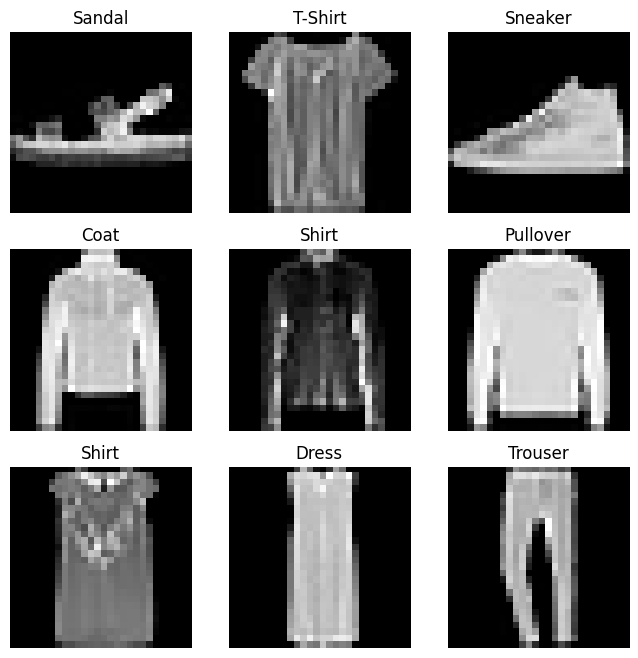

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [7]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Device: cuda:0
Epoch 1 Training...


100%|██████████| 1875/1875 [00:14<00:00, 133.57it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.58it/s] 


Epoch 1: Train_accuracy: 75.45%, Train_loss: 0.641341, Test_accuracy: 81.84%, Test_loss: 0.495771
Epoch 2 Training...


100%|██████████| 1875/1875 [00:12<00:00, 151.37it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:04<00:00, 63.66it/s] 


Epoch 2: Train_accuracy: 84.99%, Train_loss: 0.412623, Test_accuracy: 85.74%, Test_loss: 0.389276
Epoch 3 Training...


100%|██████████| 1875/1875 [00:14<00:00, 130.05it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:05<00:00, 60.29it/s] 


Epoch 3: Train_accuracy: 86.99%, Train_loss: 0.354005, Test_accuracy: 86.37%, Test_loss: 0.369121
Epoch 4 Training...


100%|██████████| 1875/1875 [00:15<00:00, 117.79it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:04<00:00, 72.49it/s] 


Epoch 4: Train_accuracy: 88.13%, Train_loss: 0.321617, Test_accuracy: 87.26%, Test_loss: 0.345787
Epoch 5 Training...


100%|██████████| 1875/1875 [00:14<00:00, 130.09it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:05<00:00, 58.51it/s] 


Epoch 5: Train_accuracy: 89.06%, Train_loss: 0.296519, Test_accuracy: 88.37%, Test_loss: 0.317564
Epoch 6 Training...


100%|██████████| 1875/1875 [00:17<00:00, 109.92it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:04<00:00, 68.29it/s] 


Epoch 6: Train_accuracy: 89.63%, Train_loss: 0.278789, Test_accuracy: 88.64%, Test_loss: 0.311486
Epoch 7 Training...


100%|██████████| 1875/1875 [00:14<00:00, 129.21it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:04<00:00, 67.46it/s] 


Epoch 7: Train_accuracy: 90.17%, Train_loss: 0.263464, Test_accuracy: 89.17%, Test_loss: 0.306137
Epoch 8 Training...


100%|██████████| 1875/1875 [00:13<00:00, 134.39it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:04<00:00, 64.57it/s] 


Epoch 8: Train_accuracy: 90.64%, Train_loss: 0.250247, Test_accuracy: 88.65%, Test_loss: 0.314851
Epoch 9 Training...


100%|██████████| 1875/1875 [00:16<00:00, 115.06it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.95it/s] 


Epoch 9: Train_accuracy: 91.03%, Train_loss: 0.239378, Test_accuracy: 88.81%, Test_loss: 0.310506
Epoch 10 Training...


100%|██████████| 1875/1875 [00:14<00:00, 125.54it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:04<00:00, 66.68it/s] 


Epoch 10: Train_accuracy: 91.36%, Train_loss: 0.229372, Test_accuracy: 89.38%, Test_loss: 0.293903
Epoch 11 Training...


100%|██████████| 1875/1875 [00:12<00:00, 145.30it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:04<00:00, 65.23it/s] 


Epoch 11: Train_accuracy: 91.75%, Train_loss: 0.220926, Test_accuracy: 89.47%, Test_loss: 0.299053
Epoch 12 Training...


100%|██████████| 1875/1875 [00:13<00:00, 140.22it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:04<00:00, 67.20it/s] 


Epoch 12: Train_accuracy: 91.87%, Train_loss: 0.212736, Test_accuracy: 89.73%, Test_loss: 0.291155
Epoch 13 Training...


100%|██████████| 1875/1875 [00:13<00:00, 142.05it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:05<00:00, 62.16it/s] 


Epoch 13: Train_accuracy: 92.38%, Train_loss: 0.203514, Test_accuracy: 89.60%, Test_loss: 0.292634
Epoch 14 Training...


100%|██████████| 1875/1875 [00:13<00:00, 140.13it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:04<00:00, 64.05it/s] 


Epoch 14: Train_accuracy: 92.63%, Train_loss: 0.196786, Test_accuracy: 89.04%, Test_loss: 0.305439
Epoch 15 Training...


100%|██████████| 1875/1875 [00:12<00:00, 144.71it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:04<00:00, 63.45it/s] 


Epoch 15: Train_accuracy: 92.84%, Train_loss: 0.188507, Test_accuracy: 89.67%, Test_loss: 0.305449
Epoch 16 Training...


100%|██████████| 1875/1875 [00:13<00:00, 139.08it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:05<00:00, 61.77it/s] 


Epoch 16: Train_accuracy: 93.12%, Train_loss: 0.181072, Test_accuracy: 89.62%, Test_loss: 0.312185
Epoch 17 Training...


100%|██████████| 1875/1875 [00:14<00:00, 130.39it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:05<00:00, 61.98it/s] 


Epoch 17: Train_accuracy: 93.34%, Train_loss: 0.175223, Test_accuracy: 89.42%, Test_loss: 0.320780
Epoch 18 Training...


100%|██████████| 1875/1875 [00:13<00:00, 134.56it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:05<00:00, 57.33it/s] 


Epoch 18: Train_accuracy: 93.54%, Train_loss: 0.167997, Test_accuracy: 88.67%, Test_loss: 0.339841
Epoch 19 Training...


100%|██████████| 1875/1875 [00:14<00:00, 125.85it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:05<00:00, 61.53it/s] 


Epoch 19: Train_accuracy: 93.78%, Train_loss: 0.163658, Test_accuracy: 89.00%, Test_loss: 0.329204
Epoch 20 Training...


100%|██████████| 1875/1875 [00:14<00:00, 130.73it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:05<00:00, 61.44it/s] 


Epoch 20: Train_accuracy: 93.87%, Train_loss: 0.159674, Test_accuracy: 89.32%, Test_loss: 0.330972
Epoch 21 Training...


100%|██████████| 1875/1875 [00:14<00:00, 128.44it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:05<00:00, 61.54it/s] 


Epoch 21: Train_accuracy: 94.09%, Train_loss: 0.154613, Test_accuracy: 89.75%, Test_loss: 0.337039
Epoch 22 Training...


100%|██████████| 1875/1875 [00:14<00:00, 133.11it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:04<00:00, 64.12it/s] 


Epoch 22: Train_accuracy: 94.34%, Train_loss: 0.147496, Test_accuracy: 89.90%, Test_loss: 0.347178
Epoch 23 Training...


100%|██████████| 1875/1875 [00:14<00:00, 133.40it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:05<00:00, 60.93it/s] 


Epoch 23: Train_accuracy: 94.58%, Train_loss: 0.142811, Test_accuracy: 89.53%, Test_loss: 0.362346
Epoch 24 Training...


100%|██████████| 1875/1875 [00:14<00:00, 133.10it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:05<00:00, 59.84it/s] 


Epoch 24: Train_accuracy: 94.59%, Train_loss: 0.139296, Test_accuracy: 89.64%, Test_loss: 0.369816
Epoch 25 Training...


100%|██████████| 1875/1875 [00:14<00:00, 131.76it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:04<00:00, 63.19it/s] 


Epoch 25: Train_accuracy: 94.74%, Train_loss: 0.136054, Test_accuracy: 88.95%, Test_loss: 0.375696
Epoch 26 Training...


100%|██████████| 1875/1875 [00:16<00:00, 116.85it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:05<00:00, 59.42it/s] 


Epoch 26: Train_accuracy: 94.85%, Train_loss: 0.132556, Test_accuracy: 89.16%, Test_loss: 0.386039
Epoch 27 Training...


100%|██████████| 1875/1875 [00:13<00:00, 137.10it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:05<00:00, 60.69it/s] 

Epoch 27: Train_accuracy: 95.09%, Train_loss: 0.126750, Test_accuracy: 89.54%, Test_loss: 0.396463
Early stopping triggered. No improvement for 15 epochs.


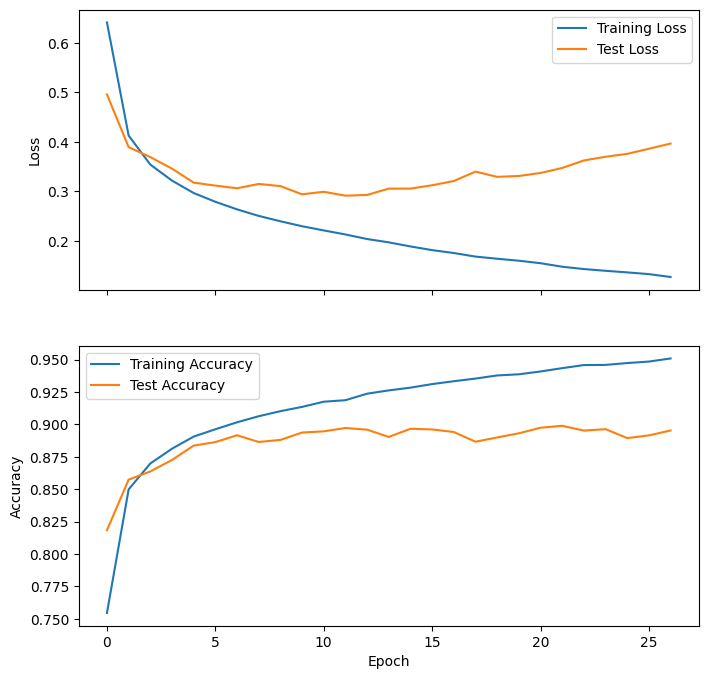

In [12]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

In [13]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% "
          f"accuracy")

Epoch 11 has 0.291 loss with 89.73% accuracy


### MixUp

In [24]:
from torchvision.transforms import v2

In [25]:
NUM_CLASSES = 10
mixup = v2.MixUp(num_classes=NUM_CLASSES)

In [26]:
from torch.utils.data import default_collate

def collate_fn(batch):
    return mixup(*default_collate(batch))

trainloader_with_mixup = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_OF_WORKERS, collate_fn=collate_fn)
testloader_with_mixup = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_OF_WORKERS, collate_fn=collate_fn)

In [27]:
model = GarmentClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [28]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="mixup",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Using cuda:0
Epoch 1 Training...


100%|██████████| 1875/1875 [00:08<00:00, 220.90it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:03<00:00, 96.16it/s] 


Epoch 1: Train_accuracy: 75.32%, Train_loss: 0.647951, Test_accuracy: 81.99%, Test_loss: 0.495010
Epoch 2 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.60it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:03<00:00, 102.87it/s]


Epoch 2: Train_accuracy: 84.23%, Train_loss: 0.429472, Test_accuracy: 85.25%, Test_loss: 0.402835
Epoch 3 Training...


100%|██████████| 1875/1875 [00:07<00:00, 245.21it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:02<00:00, 110.43it/s]


Epoch 3: Train_accuracy: 86.42%, Train_loss: 0.369091, Test_accuracy: 85.77%, Test_loss: 0.384234
Epoch 4 Training...


100%|██████████| 1875/1875 [00:07<00:00, 234.39it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.31it/s]


Epoch 4: Train_accuracy: 87.44%, Train_loss: 0.338315, Test_accuracy: 86.97%, Test_loss: 0.363131
Epoch 5 Training...


100%|██████████| 1875/1875 [00:07<00:00, 242.25it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:02<00:00, 109.41it/s]


Epoch 5: Train_accuracy: 88.42%, Train_loss: 0.313121, Test_accuracy: 87.55%, Test_loss: 0.337119
Epoch 6 Training...


100%|██████████| 1875/1875 [00:07<00:00, 235.53it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.92it/s]


Epoch 6: Train_accuracy: 89.15%, Train_loss: 0.293822, Test_accuracy: 87.07%, Test_loss: 0.353381
Epoch 7 Training...


100%|██████████| 1875/1875 [00:07<00:00, 239.15it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:02<00:00, 105.24it/s]


Epoch 7: Train_accuracy: 89.57%, Train_loss: 0.278071, Test_accuracy: 88.54%, Test_loss: 0.316314
Epoch 8 Training...


100%|██████████| 1875/1875 [00:07<00:00, 251.07it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:03<00:00, 103.85it/s]


Epoch 8: Train_accuracy: 90.11%, Train_loss: 0.264947, Test_accuracy: 88.68%, Test_loss: 0.312444
Epoch 9 Training...


100%|██████████| 1875/1875 [00:08<00:00, 231.73it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.29it/s]


Epoch 9: Train_accuracy: 90.47%, Train_loss: 0.254464, Test_accuracy: 88.80%, Test_loss: 0.315024
Epoch 10 Training...


100%|██████████| 1875/1875 [00:07<00:00, 247.82it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:02<00:00, 110.60it/s]


Epoch 10: Train_accuracy: 90.88%, Train_loss: 0.244536, Test_accuracy: 88.89%, Test_loss: 0.316654
Epoch 11 Training...


100%|██████████| 1875/1875 [00:07<00:00, 248.46it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:03<00:00, 104.22it/s]


Epoch 11: Train_accuracy: 91.22%, Train_loss: 0.233136, Test_accuracy: 88.98%, Test_loss: 0.313523
Epoch 12 Training...


100%|██████████| 1875/1875 [00:10<00:00, 187.20it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:03<00:00, 101.98it/s]


Epoch 12: Train_accuracy: 91.57%, Train_loss: 0.225801, Test_accuracy: 88.61%, Test_loss: 0.329326
Epoch 13 Training...


100%|██████████| 1875/1875 [00:09<00:00, 192.30it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:02<00:00, 104.45it/s]


Epoch 13: Train_accuracy: 91.87%, Train_loss: 0.217159, Test_accuracy: 88.87%, Test_loss: 0.316056
Epoch 14 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.85it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:03<00:00, 88.17it/s] 


Epoch 14: Train_accuracy: 92.02%, Train_loss: 0.209573, Test_accuracy: 89.21%, Test_loss: 0.306891
Epoch 15 Training...


100%|██████████| 1875/1875 [00:12<00:00, 151.31it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:03<00:00, 89.49it/s] 


Epoch 15: Train_accuracy: 92.31%, Train_loss: 0.204389, Test_accuracy: 88.79%, Test_loss: 0.309282
Epoch 16 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.94it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:03<00:00, 90.78it/s] 


Epoch 16: Train_accuracy: 92.65%, Train_loss: 0.194666, Test_accuracy: 89.53%, Test_loss: 0.317448
Epoch 17 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.24it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:03<00:00, 95.74it/s] 


Epoch 17: Train_accuracy: 92.72%, Train_loss: 0.189340, Test_accuracy: 89.13%, Test_loss: 0.316111
Epoch 18 Training...


100%|██████████| 1875/1875 [00:11<00:00, 166.69it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:03<00:00, 92.04it/s] 


Epoch 18: Train_accuracy: 93.07%, Train_loss: 0.181488, Test_accuracy: 89.06%, Test_loss: 0.314740
Epoch 19 Training...


100%|██████████| 1875/1875 [00:12<00:00, 155.22it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:02<00:00, 104.42it/s]


Epoch 19: Train_accuracy: 93.34%, Train_loss: 0.176112, Test_accuracy: 89.19%, Test_loss: 0.316626
Epoch 20 Training...


100%|██████████| 1875/1875 [00:09<00:00, 198.13it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:02<00:00, 104.76it/s]


Epoch 20: Train_accuracy: 93.49%, Train_loss: 0.171417, Test_accuracy: 89.12%, Test_loss: 0.339850
Epoch 21 Training...


100%|██████████| 1875/1875 [00:09<00:00, 193.03it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.20it/s]


Epoch 21: Train_accuracy: 93.78%, Train_loss: 0.166496, Test_accuracy: 89.58%, Test_loss: 0.330917
Epoch 22 Training...


100%|██████████| 1875/1875 [00:10<00:00, 183.12it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.92it/s]


Epoch 22: Train_accuracy: 93.78%, Train_loss: 0.161221, Test_accuracy: 89.15%, Test_loss: 0.340597
Epoch 23 Training...


100%|██████████| 1875/1875 [00:10<00:00, 172.29it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:03<00:00, 102.04it/s]


Epoch 23: Train_accuracy: 94.10%, Train_loss: 0.157024, Test_accuracy: 89.61%, Test_loss: 0.351439
Epoch 24 Training...


100%|██████████| 1875/1875 [00:08<00:00, 230.32it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:02<00:00, 111.32it/s]


Epoch 24: Train_accuracy: 94.14%, Train_loss: 0.154146, Test_accuracy: 89.19%, Test_loss: 0.351253
Epoch 25 Training...


100%|██████████| 1875/1875 [00:07<00:00, 241.60it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:02<00:00, 110.46it/s]


Epoch 25: Train_accuracy: 94.30%, Train_loss: 0.147662, Test_accuracy: 89.21%, Test_loss: 0.364278
Epoch 26 Training...


100%|██████████| 1875/1875 [00:07<00:00, 237.23it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:02<00:00, 111.74it/s]


Epoch 26: Train_accuracy: 94.56%, Train_loss: 0.141419, Test_accuracy: 88.49%, Test_loss: 0.378712
Epoch 27 Training...


100%|██████████| 1875/1875 [00:08<00:00, 230.96it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:02<00:00, 107.91it/s]


Epoch 27: Train_accuracy: 94.60%, Train_loss: 0.139092, Test_accuracy: 89.35%, Test_loss: 0.382698
Epoch 28 Training...


100%|██████████| 1875/1875 [00:08<00:00, 222.16it/s]


Epoch 28 Testing...


100%|██████████| 313/313 [00:03<00:00, 101.24it/s]


Epoch 28: Train_accuracy: 94.84%, Train_loss: 0.133957, Test_accuracy: 89.40%, Test_loss: 0.383205
Epoch 29 Training...


100%|██████████| 1875/1875 [00:07<00:00, 235.82it/s]


Epoch 29 Testing...


100%|██████████| 313/313 [00:03<00:00, 102.44it/s]

Epoch 29: Train_accuracy: 94.86%, Train_loss: 0.133666, Test_accuracy: 89.37%, Test_loss: 0.381954
Early stopping triggered. No improvement for 15 epochs.


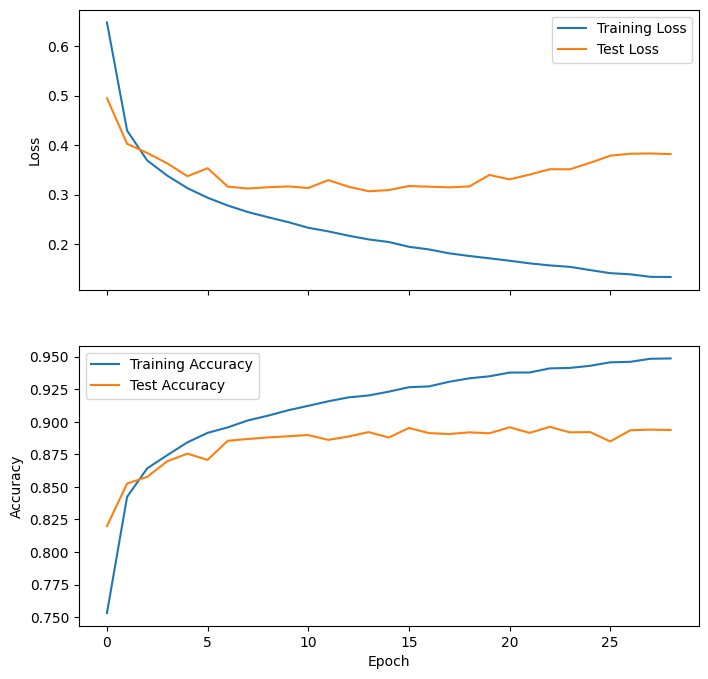

In [29]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

In [11]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 32: Epoch 11 has 0.291 loss with 89.73% accuracy
